<a href="https://colab.research.google.com/github/danyfatihul-14/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul 3 – Operasi Citra Sederhana – Linier Brightness, Contrast, Inverse Logarithmic Brightness, dan Grayscale Image**
> Nama: Dany Fatihul Ihsan

> NIM: 2241720251

> Kelas: TI-3B


#Praktikum

1. Akses Folder image pada Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Transformasi Linier Brightness

2. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan transformasi linier brightness adalah sebagai berikut:
>g(x, y) = f(x, y) + b
dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness. Tuliskan potongan kode berikut untuk mengimplementasikan linier brightness pada google colab:

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 100


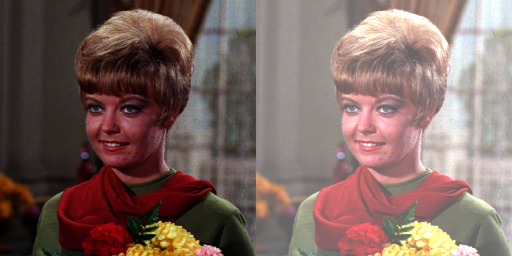

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

#Tugas Praktikum
1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

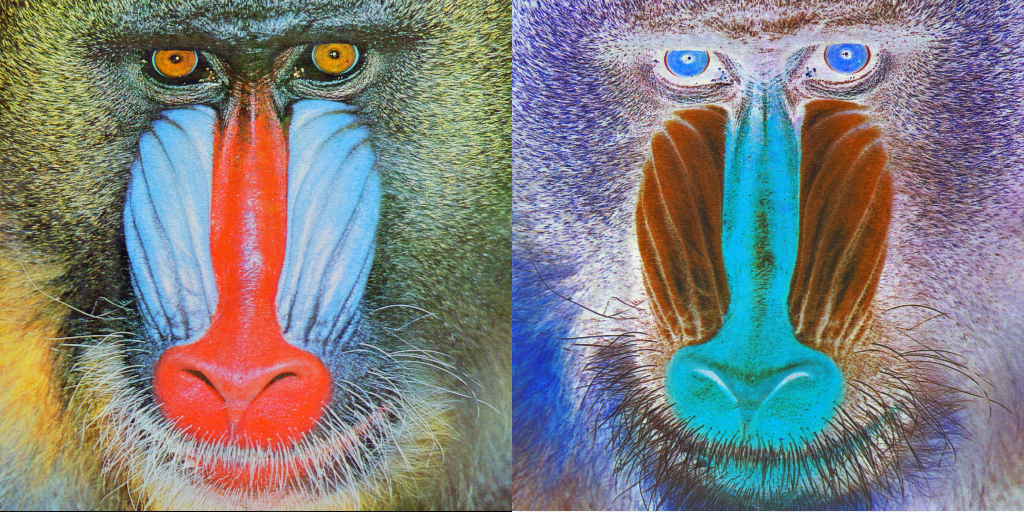

In [ ]:
ktp_img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
inverted_img = np.zeros(ktp_img.shape, ktp_img.dtype)

for a in range(ktp_img.shape[0]):
  for b in range(ktp_img.shape[1]):
    for c in range(ktp_img.shape[2]):
      inverted_img[a,b,c] = np.clip(255 - ktp_img[a,b,c], 0, 255)

final_frame = cv.hconcat((ktp_img, inverted_img))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 s.d 255]: 50
Masukkan nilai kontras [1.0 s.d 3.0]: 2


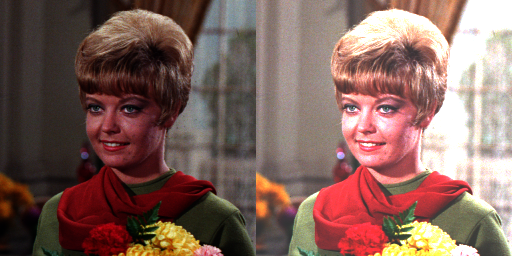

In [ ]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 s.d 255]: '))
    contrast = int(input('Masukkan nilai kontras [1.0 s.d 3.0]: '))
except ValueError:
    print('Error, not a number')

female_img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
contrast_brightness = np.zeros(female_img.shape, female_img.dtype)

for r in range(female_img.shape[0]):
  for g in range(female_img.shape[1]):
    for b in range(female_img.shape[2]):

      contrast_brightness[r, g, b] = np.clip(contrast * female_img[r, g, b] + brightness, 0, 255)


final_frame = cv.hconcat((female_img, contrast_brightness))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


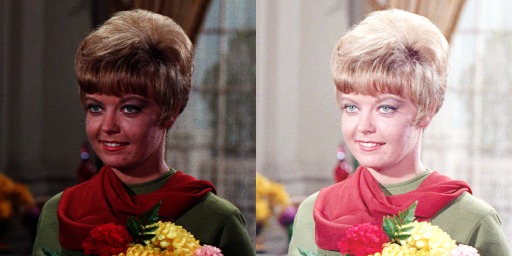

In [ ]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

female_img = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
log_brightness = np.zeros(female_img.shape, female_img.dtype)

for r in range(female_img.shape[0]):
  for g in range(female_img.shape[1]):
    for b in range(female_img.shape[2]):
      log_brightness[r, g, b] = np.clip(brightness * np.log(1 + female_img[r, g, b]), 0, 255)

final_frame = cv.hconcat((female_img, log_brightness))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:
*   Averaging

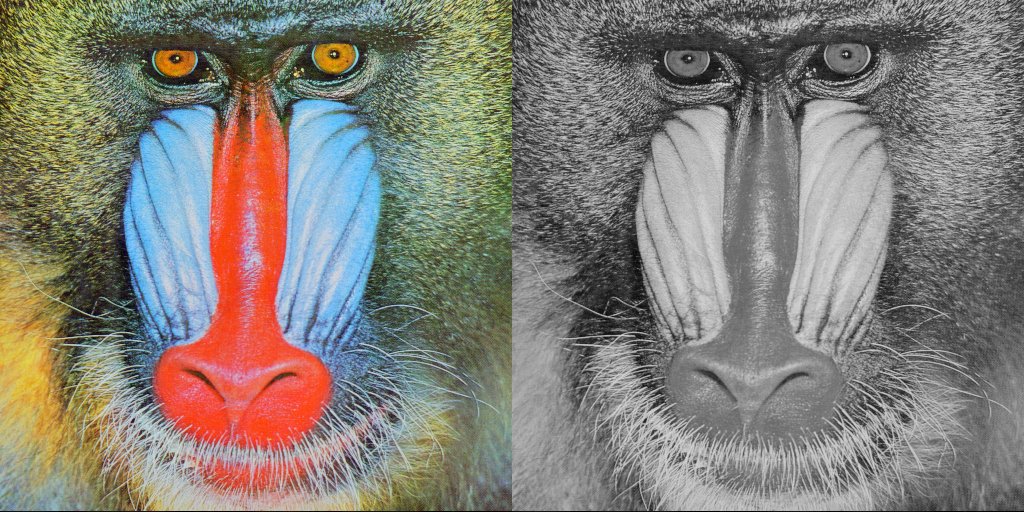

In [ ]:
averaging_img = np.zeros((ktp_img.shape[0], ktp_img.shape[1], 3), ktp_img.dtype)

for y in range(ktp_img.shape[0]):
  for x in range(ktp_img.shape[1]):
    R = int(ktp_img[y, x, 0])
    G = int(ktp_img[y, x, 1])
    B = int(ktp_img[y, x, 2])
    gray = int((R + G + B) / 3)
    averaging_img[y, x] = gray

final_frame = cv.hconcat((ktp_img, averaging_img))
cv2_imshow(final_frame)



*   Lightness



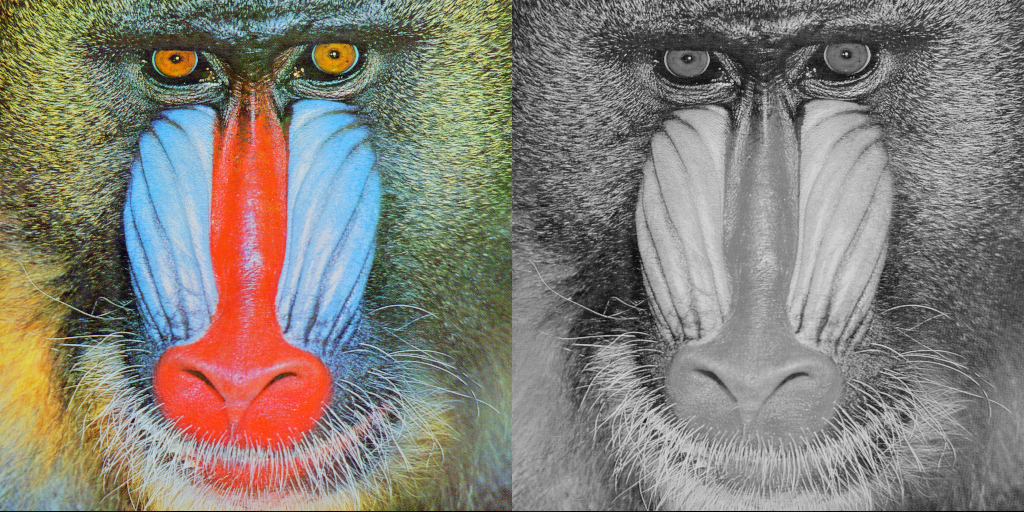

In [ ]:
lightness_img = np.zeros((ktp_img.shape[0], ktp_img.shape[1], 3), ktp_img.dtype)

for y in range(ktp_img.shape[0]):
  for x in range(ktp_img.shape[1]):
    R = int(ktp_img[y, x, 0])
    G = int(ktp_img[y, x, 1])
    B = int(ktp_img[y, x, 2])
    gray = int(((np.max([R, G, B]) + np.min([R, G, B])) / 2))
    lightness_img[y, x] = gray

final_frame = cv.hconcat((ktp_img, lightness_img))
cv2_imshow(final_frame)



*   Luminance




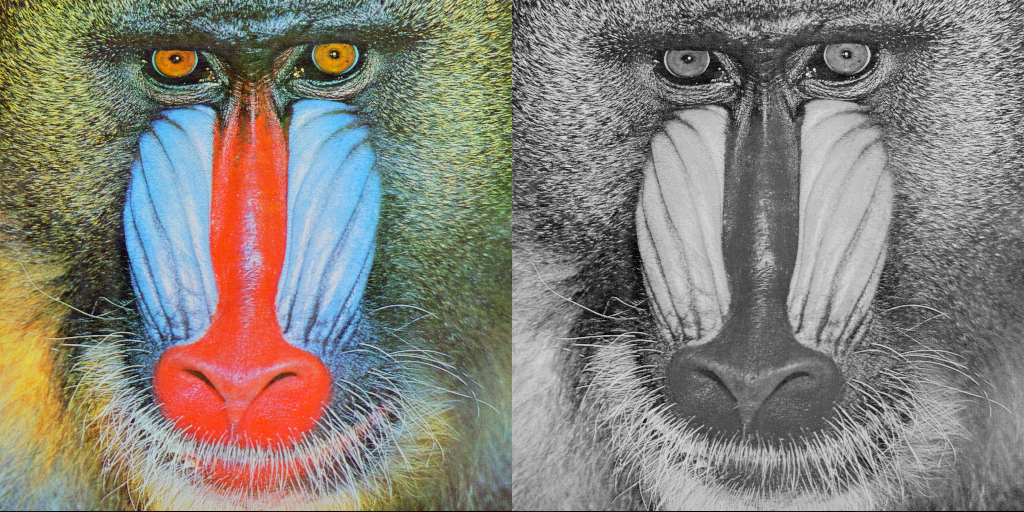

In [ ]:
luminance_img = np.zeros((ktp_img.shape[0], ktp_img.shape[1], 3), ktp_img.dtype)

for y in range(ktp_img.shape[0]):
  for x in range(ktp_img.shape[1]):
    luminance_img[y, x] = np.clip(0.07 * ktp_img[y,x,2] + 0.72 * ktp_img[y,x,1] + 0.21 * ktp_img[y,x,1], 0, 255)

final_frame = cv.hconcat((ktp_img, luminance_img))
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

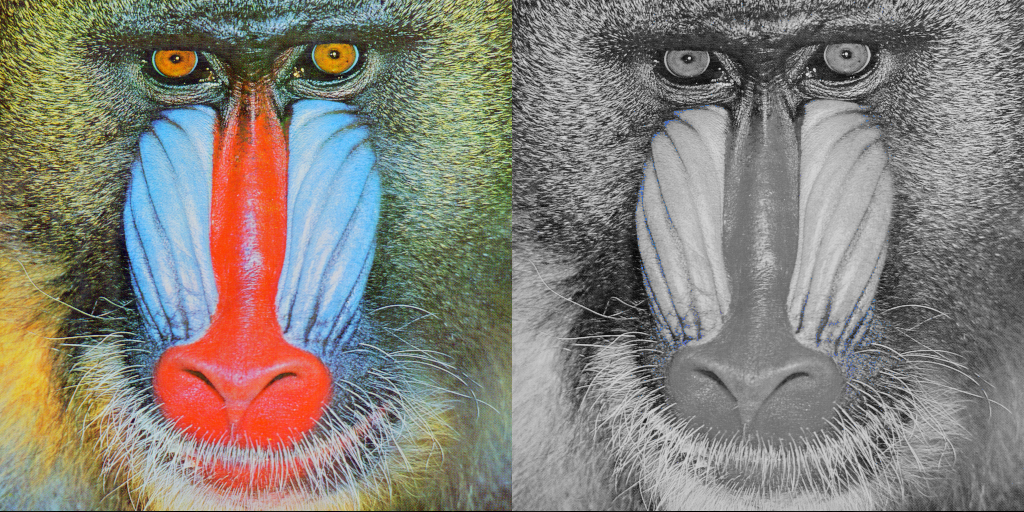

In [ ]:
# Percobaan 1
# Initialize an empty array for the blue mask image
blue_mask_img = np.zeros(ktp_img.shape, ktp_img.dtype)

# Iterate over each pixel in the image
for y in range(ktp_img.shape[0]):
    for x in range(ktp_img.shape[1]):
        b, g, r = ktp_img[y, x]  # OpenCV reads images in BGR format

        # Check for non-blue regions
        if r > 124 or g > 124 or b < 150:
            # Convert non-blue areas to grayscale using the luminance method
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)
            blue_mask_img[y, x] = [gray, gray, gray]
        else:
            # Preserve blue areas
            blue_mask_img[y, x] = [b, g, r]

# Concatenate the original and the masked image side by side
final_frame = cv.hconcat((ktp_img, blue_mask_img))

# Display the final image
cv2_imshow(final_frame)

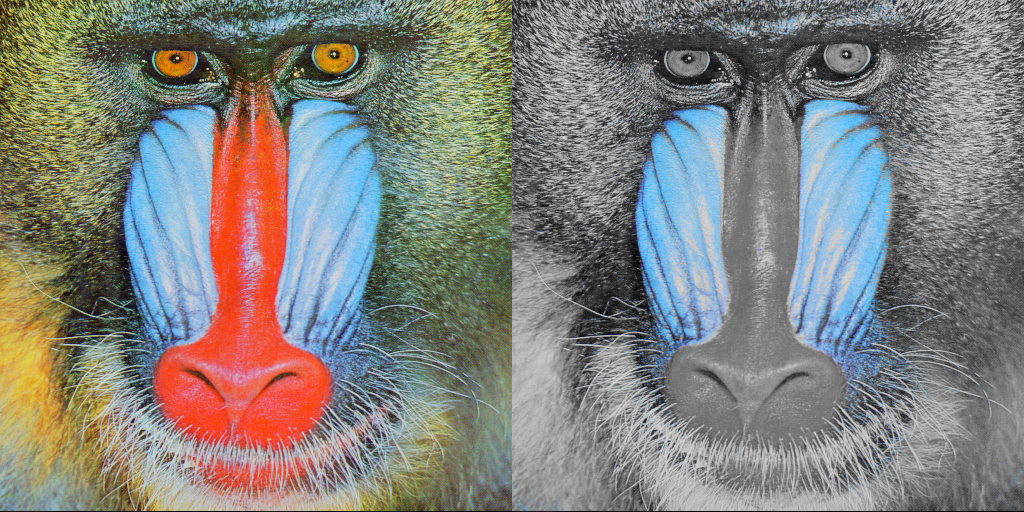

In [ ]:
# Percobaan 2
# Convert the input image from BGR to HSV color space
hsv_img = cv.cvtColor(ktp_img, cv.COLOR_BGR2HSV)

# Define the lower and upper range of blue color in HSV
lower_blue = np.array([100, 50, 50])
upper_blue = np.array([140, 255, 255])

# Create a mask for the blue color using the defined range
blue_mask = cv.inRange(hsv_img, lower_blue, upper_blue)

# Initialize an empty array for the blue mask image
blue_mask_img = np.zeros(ktp_img.shape, ktp_img.dtype)

# Iterate over each pixel in the image
for y in range(ktp_img.shape[0]):
    for x in range(ktp_img.shape[1]):
        b, g, r = ktp_img[y, x]  # OpenCV reads images in BGR format

        # Check if the pixel is in the blue mask
        if blue_mask[y, x] > 0:
            # Preserve blue areas
            blue_mask_img[y, x] = [b, g, r]
        else:
            # Convert non-blue areas to grayscale using the luminance method
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)
            blue_mask_img[y, x] = [gray, gray, gray]

# Concatenate the original and the masked image side by side
final_frame = cv.hconcat((ktp_img, blue_mask_img))

# Display the final image
cv2_imshow(final_frame)